# Fourier Transform

This notebook will explain what a fourier transform is and show how it can be implemented in a real world application : transforming the sound of a stag into its constiuent frequencies.

### What are Fourier Transforms?
Fourier transform is a technique that transforms a time based sound into another variables as a base. A usual sound wave is visualised as a function over time `f(t)` but using mathematics this function over time can be transformed to be another function over a different variable (like frequency) `g(z)`. This is a very useful technique that can be used to make hard equatrions easier to solve.

We will be using the discrete fourier transform in this notebook.

### Difference between Fourier transform and the Discrete Fourier Transform
The fourier transform looks like this in mathematical notation:

$ F(n) = \frac{1}{N} \int_{k=0}^{N-1} f(k) \times e^{-j \frac{2 \pi}{N}nk} $

We would need to intregrate on every infinite section of the wave but this is impossible in real world examples. However, we can still use the mathematics in practice, using discrete chunks and summing the result instead. This is what we call the discrete fourier transform.

$ F(n) = \frac{1}{N} \sum_{k=0}^{N-1} f(k) \times e^{-j \frac{2 \pi}{N}nk} $


### What are fourier transforms used for?
There are mamy real world applications for fourier transforms like:
- Music industry - It helps identify what frequencies are in the audio and can remove background noises.
- Image editing - It can identify colour frequencies and again remove/keep necessary frquencies.
- Astrophysics - It can support the cleaning and analysing of data from telescopes to assist in mapping the universe.
- Healthcare - Fourier transforms are widely used in MRI and other imaging diagnostic tests.
- and many more!


### What is this example about?
This example is to see which frequencies are in a stags call. In this notebook we will:
- import all relevant packages
- read in the sound information and clean it
- define useful functions to use later on
- run the fourier transform for all frequencies
- visualise the transformed data.

We will see how the fourier transform finds which frequencies are in the sound data and then we will compare with the pre defined fast fourier transform function from the package Scipy.


In [1]:
# Import required packages
%pip install numpy
%pip install scipy
%pip install matplotlib
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq
from scipy.io import wavfile as wav

%matplotlib inline

In [2]:
# useful defined functions


def create_vis(
    x_array: np.array = None,
    y_array: np.array = None,
    coords: list = None,
    title: str = None,
    x_title: str = None,
    y_title: str = None,
) -> plt.Figure:
    """Create a visualisation."""
    # set up figure to amend
    fig, ax = plt.subplots(figsize=(10, 4))

    # plot graph depending on input
    if coords:
        ax.plot(coords, color="#A020F0")
    elif x_array:
        ax.plot(x_array, y_array, color="#A020F0")
    else:
        ax.plot(y_array, color="#A020F0")

    # titles and axes constructing
    if x_title:
        ax.set_xlabel(x_title)
    if y_title:
        ax.set_ylabel(y_title)
    if title:
        fig.suptitle(t=title, fontsize="xx-large", color="#A020F0")

    return fig


def calculate_fourier_transform(
    data: np.array,
    frequency: int,
    n_arr: np.array,
    dp: int,
) -> float:
    """Compute fourier transform equation for a single frequency."""
    # complex number calculation
    equation_inside_trig_func = -2 * np.pi * frequency * n_arr / dp
    real_component = np.mean(data * np.cos(equation_inside_trig_func))
    imaginary_component = np.mean(data * -np.sin(equation_inside_trig_func))

    # combining real and imaginary parts
    complex_output = complex(real_component, imaginary_component)

    # to get a single output, we find the absolute of the complex number
    return np.abs(complex_output)

### The discrete fourier transform function

In the `calculate_fourier_transform` function that is defined above, you can see the discrete fourier transform function that we have created. This holds the majority of the mathematical code that we are using in this example.

In mathematical notation, we write the discrete fourier transform equation as:

$ F(n) = \frac{1}{N} \sum_{k=0}^{N-1} f(k) \times e^{-j \frac{2 \pi}{N}nk} $

For the above function, we split the equation into its real and imaginary components using Euler's identity.

$ e^{i \theta} = cos(\theta) + i sin(\theta) $

Therefore our equation is as follows:

$ F(n) = \frac{1}{N} \sum_{k=0}^{N-1} f(k) \times ( cos{\theta} + i sin{\theta} ) $

for

$ \theta = -\frac{2 \pi}{N}nk $

We use the mean of each of the real and imaginary part because we are summing all the outputs and dividing by the number of points which is an arithmetic mean.

This function will get iterated over for every frequency in a later part of the code.

### Reading the sound file
We are now going to read and feed in the sound data and save useful information as its own variables for easier use later in the code.


C:\Users\heath\AppData\Local\Temp\ipykernel_18400\3448046279.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sound_info["rate"], sound_info["data"] = wav.read(stag_sound_filename)


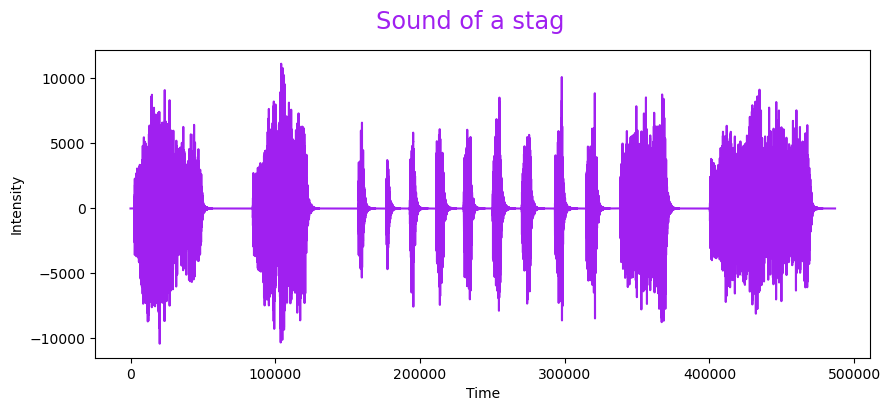

In [3]:
# Get sound information and the required data descriptors
sound_info = {}

# Initial look into the stag sound
stag_sound_filename = Path.cwd() / "Red_stag_roar-Juan_Carlos_-2004708707.wav"
sound_info["rate"], sound_info["data"] = wav.read(stag_sound_filename)
sound_info["duration"] = 11

# clean data
sound_info["data_1d"] = np.delete(sound_info["data"], 0, 1)
sound_info["nonzero_data"] = sound_info["data_1d"][sound_info["data_1d"] != 0]

# required variables
sound_info["num_of_nonzero_data_points"] = len(sound_info["nonzero_data"])
sound_info["frequencies"] = np.arange(20000)


time_based_vis = create_vis(
    y_array=sound_info["data_1d"],
    title="Sound of a stag",
    x_title="Time",
    y_title="Intensity",
)

In [4]:
# list of transformed data points for each frequency
frequencies_transformed = [
    calculate_fourier_transform(
        data=sound_info["nonzero_data"],
        frequency=freq,
        n_arr=np.arange(sound_info["num_of_nonzero_data_points"]),
        dp=sound_info["num_of_nonzero_data_points"],
    )
    for freq in sound_info["frequencies"]
]

In [5]:
# Analysis of the the frequency intensities
print(
    f"The max term in the frequency power is{np.max(frequencies_transformed)} and "
    f"the min is {np.min(frequencies_transformed)}"
)

The max term in the frequency power is65.58619845884975 and the min is 0.007751440491985303


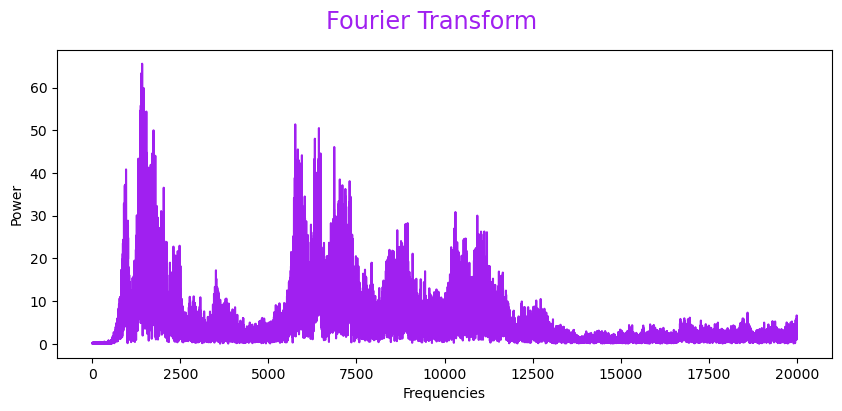

In [6]:
# Visualise fourier transform transform output
freq_based_vis = create_vis(
    y_array=frequencies_transformed,
    title="Fourier Transform",
    x_title="Frequencies",
    y_title="Power",
)

C:\Users\heath\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


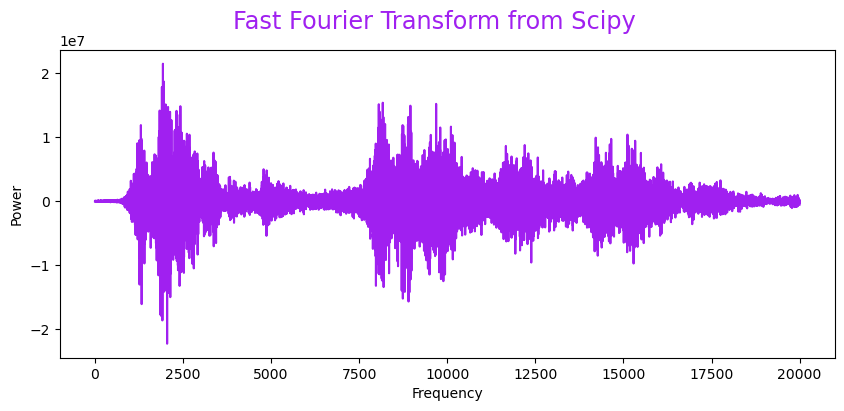

In [7]:
# Number of samples in normalized_tone
N = sound_info["data_1d"].size

# use pre-built fasst fourier transform function from scipy
yf = fft(sound_info["data_1d"].flatten())
xf = fftfreq(N, 1 / sound_info["data_1d"].size)

# clean and plot results
coords = zip(xf, yf)
coords_filtered = [c for c in coords if c[0] > 0 and c[0] < 20000]

# plot output
fft_output = create_vis(
    coords=coords_filtered,
    title="Fast Fourier Transform from Scipy",
    x_title="Frequency",
    y_title="Power",
)

### Compare DFT and FFT

So we have found that the personal defined discrete fourier transform (DFT) outputs a similar graph to the pre-defined Scipy fast fourier transform (FFT).

The DFT takes a lot longer (~4 minutes) whereas the FFT takes a matter of seconds. This is because Scipy has found ways in which to optimise and make it more efficient in the background. 

For more information about the FFT use this link: https://docs.scipy.org/doc/scipy/tutorial/fft.html

#### Overall 
We have read, cleaned and processed the sound information to output a forier transformed data. We have visualised it and compared it with the FFT. 

#### Main takeaways:
- There are many uses of the fourier transform in the real world
- We understand how the discrete fourier transform works
- We have seen the DFT in action
- We have compared it with the FFT

